In [ ]:
!git clone https://github.com/adithyamadhusoodanan/Human-Gait-Analysis.git

Cloning into 'Human-Gait-Analysis'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
cd Human-Gait-Analysis/

/content/Human-Gait-Analysis


In [ ]:
ls

'Dense .ipynb'          'Gradient Boosting.ipynb'   LSTM.ipynb
'Ensemble .ipynb'        GridSearch.ipynb          'LSTM-NEW .ipynb'
 gaitFull.csv            GridSearch-Scaled.ipynb   'Means Clustering.ipynb'
 gaitFullModified1.csv   KNN.ipynb                  NaiveBayes.ipynb
 gaitFullModified2.csv   LSTM-Copy1.ipynb


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gait = pd.read_csv("gaitFull.csv")
#gait = pd.read_csv("gaitFullModified2.csv")

In [ ]:
gait

,P1,P2,P3,P4,x1,y1,z1,x2,y2,z2,r,label
0,0,0,1,1,-0.29,-9.70,3.97,0.08,-9.31,0.27,161,0
1,0,0,1,1,0.05,-9.51,4.45,0.27,-9.05,-0.67,151,0
2,0,0,1,1,0.78,-9.48,6.54,1.96,-8.99,2.08,146,1
3,0,0,1,1,5.77,-6.85,3.06,-0.24,-8.95,6.86,144,1
4,0,0,1,1,0.45,-9.52,-0.36,0.39,-9.85,2.25,143,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,1,1,0,0,-5.31,-10.97,-6.63,-1.89,-10.10,-3.29,288,5
2372,1,1,0,0,-0.86,-9.70,-1.71,-3.69,-9.92,-2.17,276,5
2373,1,1,0,0,-0.79,-10.07,-3.23,-1.73,-9.16,1.32,251,5
2374,1,1,0,0,0.31,-10.10,3.14,3.06,-8.72,-0.20,209,6


In [ ]:
X= gait.drop('label',  axis=1)
y = gait['label']

In [ ]:
#'P1','P2','P3','x1','y1','z1','x2','y2','z2'
X = pd.DataFrame(X1 , columns= ['P1','P2','P3','r'])
Xa1 = pd.DataFrame(X1 , columns= ['x1','y1','z1'])
Xb1 = pd.DataFrame(X1 , columns= ['x2','y2','z2'])

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
Xa1 = sc.fit_transform(Xa1) 
Xb1 = sc.transform(Xb1) 

from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 1) 
  
Xa1 = pca.fit_transform(Xa1)   
explained_variance = pca.explained_variance_ratio_ 

from sklearn.decomposition import PCA 
  
pca1 = PCA(n_components = 1) 
  
Xb1 = pca1.fit_transform(Xb1)   
explained_variance = pca.explained_variance_ratio_

In [ ]:
X.insert(3, "Xa1", Xa1, True) 
X.insert(4, "Xb1", Xb1, True)

Feature: 0, Score: 0.29675
Feature: 1, Score: 0.25490
Feature: 2, Score: 0.10189
Feature: 3, Score: 0.04010
Feature: 4, Score: 0.05155
Feature: 5, Score: 0.25481


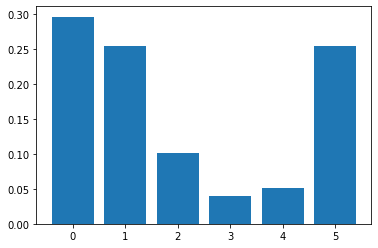

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X

,P1,P2,P3,P4,x1,y1,z1,x2,y2,z2,r
0,0,0,1,1,-0.29,-9.70,3.97,0.08,-9.31,0.27,161
1,0,0,1,1,0.05,-9.51,4.45,0.27,-9.05,-0.67,151
2,0,0,1,1,0.78,-9.48,6.54,1.96,-8.99,2.08,146
3,0,0,1,1,5.77,-6.85,3.06,-0.24,-8.95,6.86,144
4,0,0,1,1,0.45,-9.52,-0.36,0.39,-9.85,2.25,143
...,...,...,...,...,...,...,...,...,...,...,...
2371,1,1,0,0,-5.31,-10.97,-6.63,-1.89,-10.10,-3.29,288
2372,1,1,0,0,-0.86,-9.70,-1.71,-3.69,-9.92,-2.17,276
2373,1,1,0,0,-0.79,-10.07,-3.23,-1.73,-9.16,1.32,251
2374,1,1,0,0,0.31,-10.10,3.14,3.06,-8.72,-0.20,209


In [ ]:
Xt=X

In [ ]:
#x=gait[['P1','P2', 'P3',	'P4'	,'x1',	'y1',	'z1',	'x2',	'y2',	'z2'	,'r']].to_numpy()

In [ ]:
X=[]
Y=[]
for i in range(2358):

  g=Xt[0+i:10+i]
  y=gait['label'][10+i]
  Y.append(y)
  X.append(g)

In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM,BatchNormalization, TimeDistributed, Conv1D,MaxPooling1D,GRU
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y,test_size=0.1,random_state=42)

In [ ]:
y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [ ]:
X_train.shape

(2122, 10, 11)

In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1,patience=100)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 64)             2176      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             12352     
_________________________________________________________________
dropout (Dropout)            (None, 6, 64)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               19300     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 8

In [ ]:
history=model.fit(X_train, y_train, epochs=1000, batch_size=200, validation_split=0.2,shuffle=True,callbacks=[es])

Epoch 1/1000
9/9 [==============================] - 1s 65ms/step - loss: 43.2414 - accuracy: 0.1321 - val_loss: 4.7848 - val_accuracy: 0.2682
Epoch 2/1000
9/9 [==============================] - 0s 12ms/step - loss: 13.2819 - accuracy: 0.1832 - val_loss: 2.9362 - val_accuracy: 0.3882
Epoch 3/1000
9/9 [==============================] - 0s 12ms/step - loss: 5.1481 - accuracy: 0.2600 - val_loss: 1.8049 - val_accuracy: 0.3200
Epoch 4/1000
9/9 [==============================] - 0s 12ms/step - loss: 2.3510 - accuracy: 0.2886 - val_loss: 1.6449 - val_accuracy: 0.3953
Epoch 5/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.8019 - accuracy: 0.3599 - val_loss: 1.7109 - val_accuracy: 0.4376
Epoch 6/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.7752 - accuracy: 0.3399 - val_loss: 1.6019 - val_accuracy: 0.4682
Epoch 7/1000
9/9 [==============================] - 0s 13ms/step - loss: 1.6790 - accuracy: 0.4130 - val_loss: 1.5896 - val_accuracy: 0.4565
Epoch 8/100

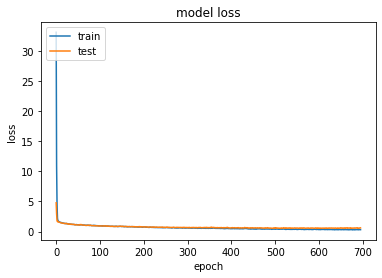

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


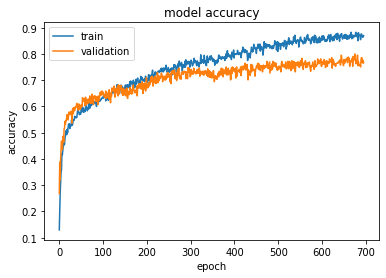

In [ ]:
from pylab import rcParams
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
x=model.predict(X_test)

In [ ]:
import tensorflow as tf
index = tf.argmax(x,axis=1)

In [ ]:
z=np.array(index)

In [ ]:
print(confusion_matrix(y_test, z))

[[23 10  0  0  1  0  0  1]
 [ 1 22  2  0  0  0  0  0]
 [ 0  2 27  3  0  0  0  0]
 [ 0  0  4 22  2  0  0  0]
 [ 0  1  0  2 29  0  0  0]
 [ 0  0  0  0  1 23  1  0]
 [ 0  0  0  0  0  6 25  2]
 [ 1  0  0  0  0  0  4 21]]


In [ ]:
d=confusion_matrix(y_test, z)

In [ ]:
print(classification_report(y_test, z)) 

              precision    recall  f1-score   support

           0       0.92      0.66      0.77        35
           1       0.63      0.88      0.73        25
           2       0.82      0.84      0.83        32
           3       0.81      0.79      0.80        28
           4       0.88      0.91      0.89        32
           5       0.79      0.92      0.85        25
           6       0.83      0.76      0.79        33
           7       0.88      0.81      0.84        26

    accuracy                           0.81       236
   macro avg       0.82      0.82      0.81       236
weighted avg       0.83      0.81      0.81       236



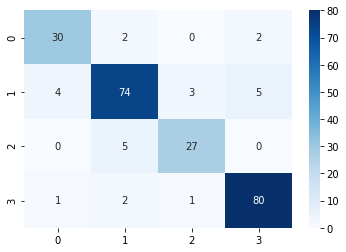

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d)
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "12345678"],
              columns = [i for i in "12345678"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

ValueError: ignored